In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format

In [3]:
df = pd.DataFrame()

with pd.HDFStore('data.mar') as store:
    df = store['mar']
df['Start_ns'] = df['Start_ns']*10**9
    
with pd.HDFStore('data.sean') as store:
    df = df.append(store['sean'])
    
    
df['Start_time'] = pd.to_datetime(df['Start_ns'])
df['Server_ns'] = df['Time_ns'] - df.loc[:,'ServerTime1':'ServerTime3'].sum(axis=1)
with pd.HDFStore('data.h5') as store:
    store['data'] = df
df

/home/arccy/LSproject/uva-ls/tools/analysis/env/lib/python3.8/site-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(
/home/arccy/LSproject/uva-ls/tools/analysis/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['Image', 'Server', 'ServerUUID']]

  exec(code_obj, self.user_global_ns, self.user_ns)


,Image,Img,Server,ServerTime1,ServerTime2,ServerTime3,ServerUUID,Servertime1,Servertime2,Servertime3,Start_ns,Start_time,ThreadTime1,ThreadTime2,ThreadTime3,Time_ns,Worker,Server_ns
0,NaN,nan,gcp-run-warm,nan,nan,nan,8651db88-f6cf-4e2b-95e7-fcc48345a872,1061201,132954120,17166,1575564010000000000,2019-12-05 16:40:10.000000000,0,90000000,0,1286396726,0,1286396726
1,NaN,nan,gcp-run-warm,nan,nan,nan,8651db88-f6cf-4e2b-95e7-fcc48345a872,2249717,53720235,26464,1575564010000000000,2019-12-05 16:40:10.000000000,0,60000000,0,119836419,0,119836419
2,NaN,nan,gcp-run-warm,nan,nan,nan,8651db88-f6cf-4e2b-95e7-fcc48345a872,1296520,57963609,64611,1575564011000000000,2019-12-05 16:40:11.000000000,0,60000000,0,296637633,0,296637633
3,NaN,nan,gcp-run-warm,nan,nan,nan,8651db88-f6cf-4e2b-95e7-fcc48345a872,1960992,56517362,25510,1575564011000000000,2019-12-05 16:40:11.000000000,0,60000000,0,124468180,0,124468180
4,NaN,nan,gcp-run-warm,nan,nan,nan,8651db88-f6cf-4e2b-95e7-fcc48345a872,359296,48206806,13828,1575564011000000000,2019-12-05 16:40:11.000000000,0,50000000,0,126585851,0,126585851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504860,422-MsheFbkq4HY.jpg,nan,aws-lambda-warm,81345796,999113559,37261486,33431da9-d79d-48a1-b0ff-5a7a02de9d71,nan,nan,nan,1575902647143232075,2019-12-09 14:44:07.143232075,4721744,73426652,107579,1864717358,40,746996517
504861,220-1N3h-TBh-R4.jpg,nan,aws-lambda-warm,38225173,679913759,58174,39f06a3d-9ed9-4035-ab6c-5630715edd07,nan,nan,nan,1575902648246607704,2019-12-09 14:44:08.246607704,1466474,48745060,53000,970044365,20,251847259
504862,070-lPliEBUZiSM.jpg,nan,aws-lambda-warm,58191061,740178108,37890672,f6db8607-1896-482b-9e02-20298711840f,nan,nan,nan,1575902648158218882,2019-12-09 14:44:08.158218882,2032612,54026451,100134,1139236860,5,302977019
504863,180-3fvmw6Vu3HM.jpg,nan,aws-lambda-warm,723123,639208793,19407510,d87572c5-a553-4c66-9eca-18a0d16383ab,nan,nan,nan,1575902648670854247,2019-12-09 14:44:08.670854247,719232,45635099,111591,805394585,16,146055159


In [4]:
servers = ["zeit-now-warm", "gcp-run-warm", "gcp-fun-warm", "azure-fun-warm", "ibm-fun-warm", "ali-fun-warm", "gcp-app-warm", "aws-lambda-warm"]
dfmap500, dfmap10, dfmapwarm, dfmapcold= {},{}, {}, {}
uuids = set()
uuid_first = []
uuid_not = []
for u in df['ServerUUID']:
    if not u in uuids:
        uuid_first.append(True)
        uuid_not.append(False)
        uuids.add(u)
    else:
        uuid_first.append(False)
        uuid_not.append(True)
for server in servers:
    dfmap500[server] = df[(df['Server'] == server) & (df['Worker'] != 0)].reset_index()
    dfmap10[server] = df[(df['Server'] == server) & (df['Worker'] == 0)].reset_index()
    dfmapcold[server] = df[(df['Server'] == server) & uuid_first].reset_index()
    dfmapwarm[server] = df[(df['Server'] == server) & uuid_not].reset_index()

df500 = pd.concat(dfmap500, axis=1, join='outer')
df10 = pd.concat(dfmap10, axis=1, join='outer')
dfcold = pd.concat(dfmapcold, axis=1, join='outer')
dfwarm = pd.concat(dfmapwarm, axis=1, join='outer')


In [5]:
dfwarm.xs('Time_ns', level=1, axis=1).count()

zeit-now-warm      91445
gcp-run-warm       84218
gcp-fun-warm       92033
azure-fun-warm     96482
ibm-fun-warm       88135
ali-fun-warm       68993
gcp-app-warm       93793
aws-lambda-warm    88894
dtype: int64

In [6]:
dfmap = {}
for server in servers:
    dfmap[server] = df[(df['Server'] == server)].reset_index()
    
plot_data = pd.concat(dfmap, axis=1, join='outer')
plot_data

zeit-now-warm                                                   \
              index Image Img         Server ServerTime1 ServerTime2   
0                 0   NaN nan  zeit-now-warm         nan         nan   
1                 1   NaN nan  zeit-now-warm         nan         nan   
2                 2   NaN nan  zeit-now-warm         nan         nan   
3                 3   NaN nan  zeit-now-warm         nan         nan   
4                 4   NaN nan  zeit-now-warm         nan         nan   
...             ...   ...  ..            ...         ...         ...   
97845           nan   NaN nan            NaN         nan         nan   
97846           nan   NaN nan            NaN         nan         nan   
97847           nan   NaN nan            NaN         nan         nan   
97848           nan   NaN nan            NaN         nan         nan   
97849           nan   NaN nan            NaN         nan         nan   

                                                                     \
      ServerTime3                            ServerUUID Servertime1   
0             nan  80da76bc-871c-42d6-bb4d-e636eb8d2442      365972   
1             nan  80da76bc-871c-42d6-bb4d-e636eb8d2442      338315   
2             nan  80da76bc-871c-42d6-bb4d-e636eb8d2442      224113   
3             nan  80da76bc-871c-42d6-bb4d-e636eb8d2442      218152   
4             nan  80da76bc-871c-42d6-bb4d-e636eb8d2442      130176   
...           ...                                   ...         ...   
97845         nan                                   NaN         nan   
97846         nan                                   NaN         nan   
97847         nan                                   NaN         nan   
97848         nan                                   NaN         nan   
97849         nan                                   NaN         nan   

                   ... aws-lambda-warm                                   \
      Servertime2  ...     Servertime2 Servertime3             Start_ns   
0       221369266  ...      1959094047       61273  1575564056000000000   
1       103321790  ...       898080825       66757  1575564057000000000   
2        99034309  ...       858956336    38125276  1575564058000000000   
3        98316669  ...       877217054       72479  1575564060000000000   
4        56986570  ...       562114238    37430524  1575564061000000000   
...           ...  ...             ...         ...                  ...   
97845         nan  ...             nan         nan  1575902647143232075   
97846         nan  ...             nan         nan  1575902648246607704   
97847         nan  ...             nan         nan  1575902648158218882   
97848         nan  ...             nan         nan  1575902648670854247   
97849         nan  ...             nan         nan  1575902648968956755   

                                                                         \
                         Start_time ThreadTime1 ThreadTime2 ThreadTime3   
0     2019-12-05 16:40:56.000000000     1452703   139780830       57222   
1     2019-12-05 16:40:57.000000000     2651881    61819739       62716   
2     2019-12-05 16:40:58.000000000     3029687    61004916       99964   
3     2019-12-05 16:41:00.000000000     2955916    59889062       68775   
4     2019-12-05 16:41:01.000000000      531967    42151154       70601   
...                             ...         ...         ...         ...   
97845 2019-12-09 14:44:07.143232075     4721744    73426652      107579   
97846 2019-12-09 14:44:08.246607704     1466474    48745060       53000   
97847 2019-12-09 14:44:08.158218882     2032612    54026451      100134   
97848 2019-12-09 14:44:08.670854247      719232    45635099      111591   
97849 2019-12-09 14:44:08.968956755      994421    47388137       44887   

                                     
          Time_ns Worker  Server_ns  
0      2691516061      0 2691516061  
1      1408151476      0 1408151476  
2      1479963357      0 1479963357  
3  

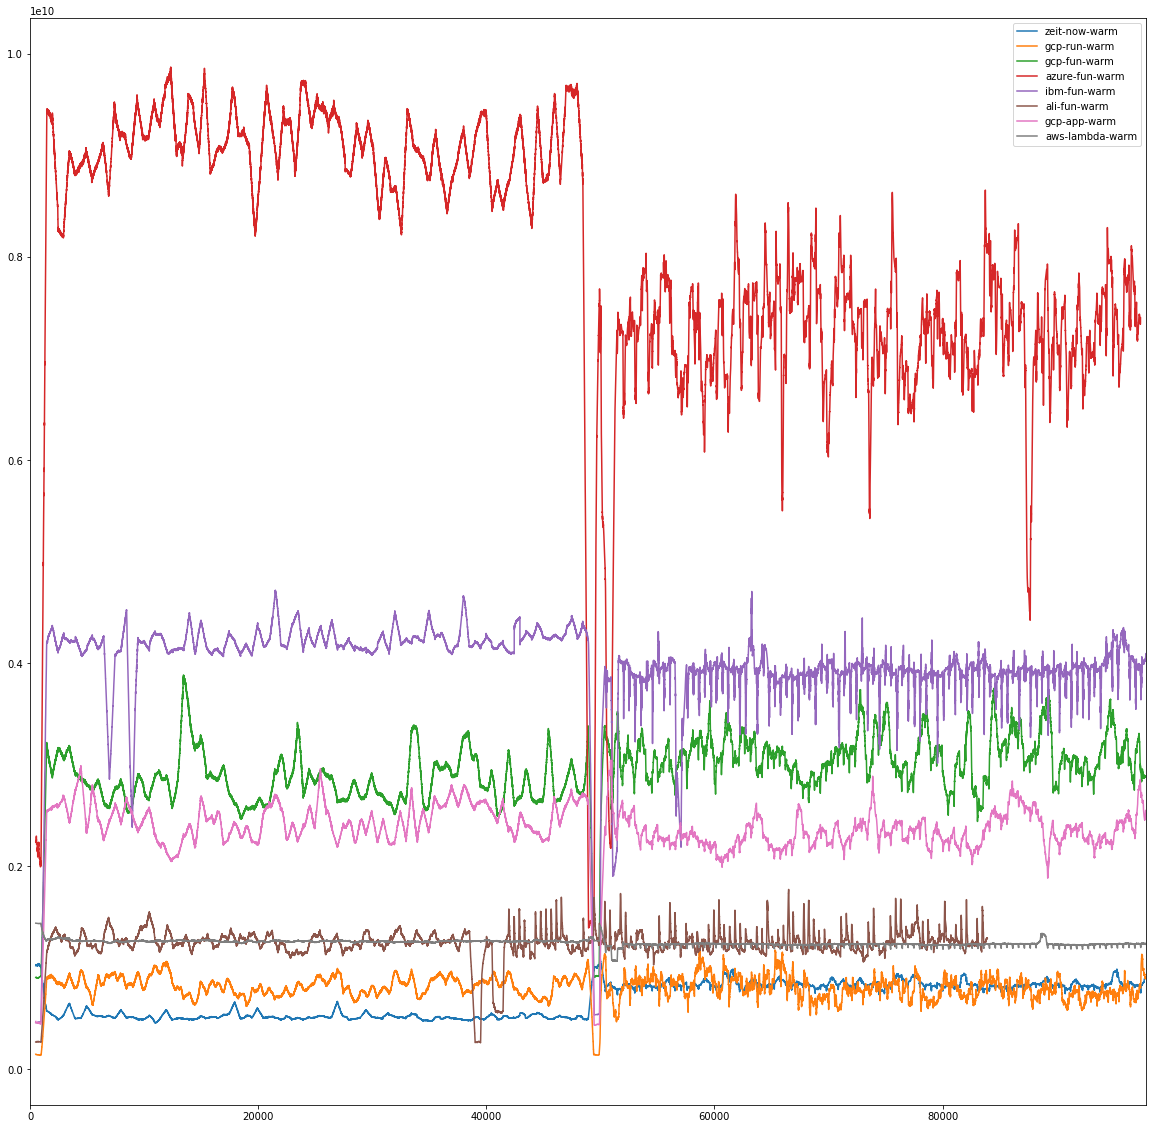

In [7]:
plot_data.xs('Time_ns', level=1, axis=1).rolling(500).mean().plot.line(figsize=(20, 20))

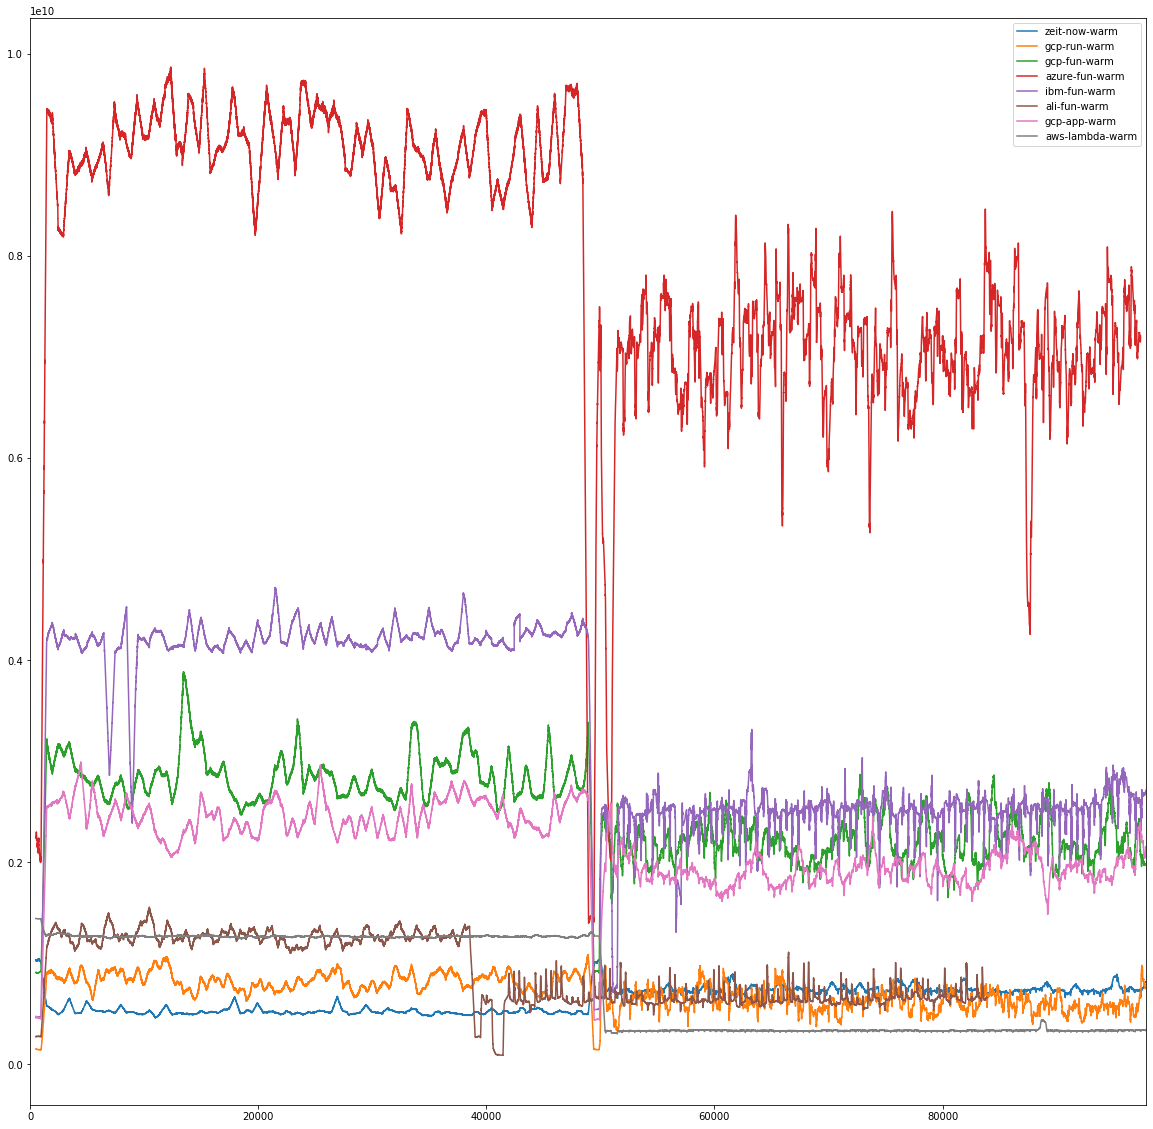

In [8]:
plot_data.xs('Server_ns', level=1, axis=1).rolling(500).mean().plot.line(figsize=(20, 20))